In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from api_keys import weather_api_key
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Assuming 'output_data/cities.csv' is the correct path to your CSV file
citipy_path = 'output_data/cities.csv'

# Read the CSV file into a DataFrame
cities_df = pd.read_csv(citipy_path)

#Convert from Kelvin to Celsius
cities_df['Max Temp'] = cities_df['Max Temp'] - 273.15

# Display the first few rows of the DataFrame
cities_df.head()


,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,badger,64.8000,-147.5333,-281.22,88,100,0.00,US,1699712408
1,1,lone grove,34.1754,-97.2628,-262.60,66,100,2.06,US,1699712300
2,2,port-aux-francais,-49.3500,70.2167,-269.93,62,19,5.72,TF,1699712409
3,3,severo-yeniseyskiy,60.3725,93.0408,-283.39,93,100,1.34,RU,1699712410
4,4,yatou,37.1500,122.3833,-270.08,75,63,3.46,CN,1699712410


In [123]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
    

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


In [124]:
# Set the API base URL

url = 'http://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'
    response = requests.get(city_url)
    city_data_list = response.json()
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data

        city_weather = city_data_list['weather'][0]

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_data_list['coord']['lat']
        city_lng = city_data_list['coord']['lon']
        city_max_temp = city_data_list['main']['temp_max']
        city_humidity = city_data_list['main']['humidity']
        city_clouds = city_data_list['clouds']['all']
        city_wind = city_data_list['wind']['speed']
        city_country = city_data_list['sys']['country']
        city_date = city_data_list['dt']
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pinheiro machado
Processing Record 2 of Set 1 | taiohae
City not found. Skipping...
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | harper
Processing Record 5 of Set 1 | doka
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | brookings
Processing Record 9 of Set 1 | kiunga
Processing Record 10 of Set 1 | blagodatnoye
Processing Record 11 of Set 1 | dolores
Processing Record 12 of Set 1 | udachny
Processing Record 13 of Set 1 | port mathurin
Processing Record 14 of Set 1 | susuman
Processing Record 15 of Set 1 | zakamensk
Processing Record 16 of Set 1 | kodiak
Processing Record 17 of Set 1 | uturoa
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | modimolle
Processing Record 20 of Set 1 | weno
Processing Record 21 of Set 1 | san juan de uraba
Processing Record 22 of Set 1 | clovis
Processing Recor

In [141]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df = city_data_df.rename_axis('City ID')

#Convert from Kelvin to Celsius
city_data_df['Max Temp'] = city_data_df['Max Temp'] - 273.15

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [142]:
# Build scatter plot for latitude vs. temperature
latitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []

for index, row in city_data_df.iterrows():

    latitude.append(row['Lat'])
    temperature.append(row['Max Temp'])
    humidity.append(row['Humidity'])
    cloudiness.append(row['Cloudiness'])
    wind_speed.append(row['Wind Speed'])

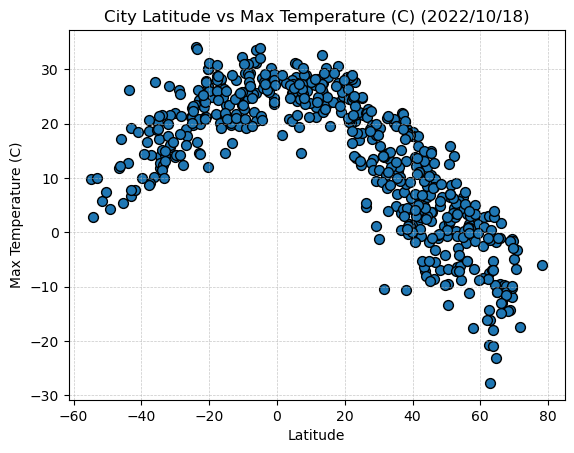

In [143]:

plt.scatter(latitude,temperature, edgecolors='black', s=50)

# Incorporate the other graph properties
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.title('City Latitude vs Max Temperature (C) (2022/10/18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

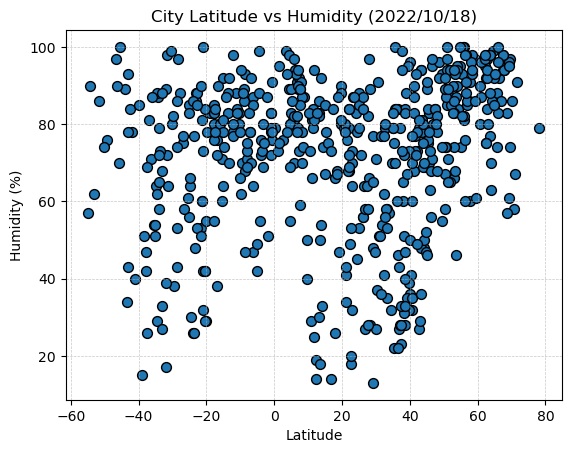

In [144]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(latitude, humidity, edgecolors='black', s=50)

# Incorporate the other graph properties
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.title('City Latitude vs Humidity (2022/10/18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

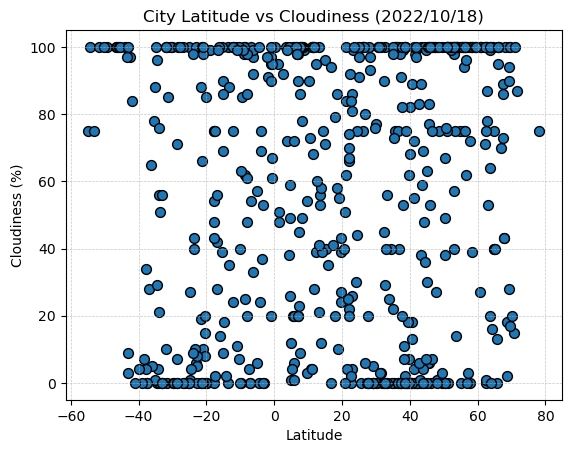

In [145]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(latitude, cloudiness, edgecolors='black', s=50)

# Incorporate the other graph properties
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.title('City Latitude vs Cloudiness (2022/10/18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

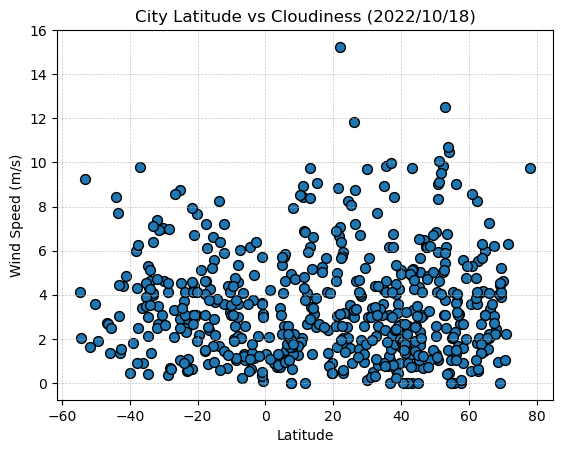

In [146]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(latitude, wind_speed, edgecolors='black', s=50)


# Incorporate the other graph properties
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.title('City Latitude vs Cloudiness (2022/10/18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [147]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi = []

for index, row in city_data_df.iterrows():
    if row['Lat'] >= 0:
        northern_hemi.append(row)

northern_hemi_df = pd.DataFrame(northern_hemi)
northern_hemi_df = northern_hemi_df.rename_axis('City ID')

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City ID,,,,,,,,,
1,bethel,41.3712,-73.4140,1.94,72,0,0.00,US,1699840743
2,harper,4.3750,-7.7169,25.71,89,38,3.42,LR,1699840773
3,doka,13.5167,35.7667,25.60,50,53,3.46,SD,1699840773
6,brookings,44.3114,-96.7984,8.43,48,0,2.57,US,1699840668
8,blagodatnoye,45.3997,42.5867,10.51,75,100,4.33,RU,1699840776


In [148]:
# Create a DataFrame with the Southern Hemisphere data (Latitude >= 0)
southern_hemi = []

for index, row in city_data_df.iterrows():
    if row['Lat'] < 0:
        southern_hemi.append(row)

southern_hemi_df = pd.DataFrame(southern_hemi)
southern_hemi_df = southern_hemi_df.rename_axis('City ID')

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City ID,,,,,,,,,
0,pinheiro machado,-31.5783,-53.3811,15.74,98,100,2.68,BR,1699840771
4,adamstown,-25.0660,-130.1015,22.80,85,100,8.73,PN,1699840774
5,waitangi,-43.9535,-176.5597,12.66,89,100,8.42,NZ,1699840762
7,kiunga,-6.1219,141.2906,33.58,47,33,1.06,PG,1699840776
9,dolores,-36.3132,-57.6792,10.18,71,65,3.42,AR,1699840777


The r-value is: -0.8740698553836298


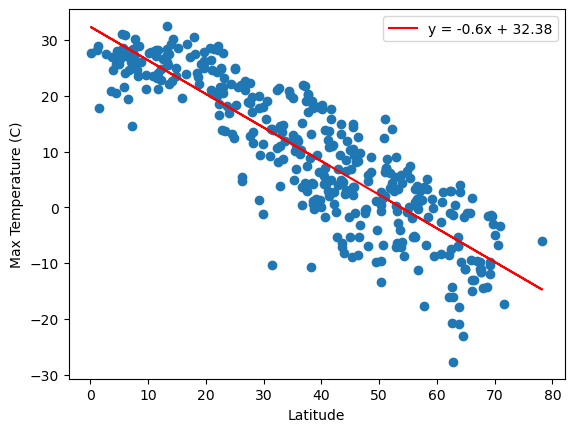

In [149]:
correlation = northern_hemi_df['Lat'].corr(northern_hemi_df['Max Temp'])

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-value is: {correlation}')
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, '-r', label=line_eq)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.legend()
plt.show()

The r-value is: 0.744814447347371


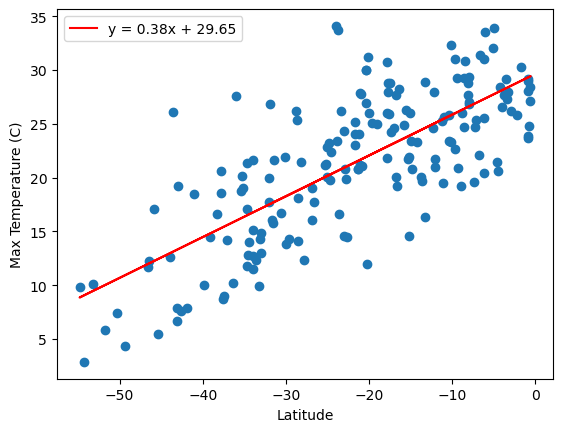

In [150]:
correlation = southern_hemi_df['Lat'].corr(southern_hemi_df['Max Temp'])

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-value is: {correlation}')
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, '-r', label=line_eq)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.legend()
plt.show()

DISCUSSION OF CORRELATION FOR LATITUDE vs MAX TEMPERATURE:
The linear regression between both charts is indicative that cities located closer to the equator will have a higher maximum temperature. There appears to be a weaker correlation among the southern hemisphere. This is because the temperature significantly drops when the Latitude is reduced from -35, compromising the strength of the correlation which would be more consistent if it was measured from that point of latitude.

The r-value is: 0.23600574917432082


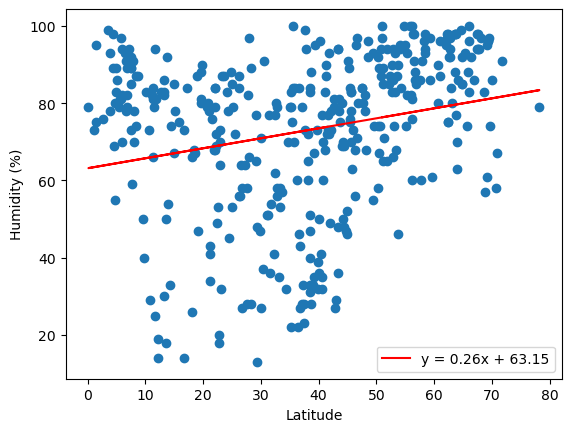

In [152]:
correlation = northern_hemi_df['Lat'].corr(northern_hemi_df['Humidity'])

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-value is: {correlation}')
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, '-r', label=line_eq)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.legend()
plt.show()

The r-value is: 0.16826245620076422


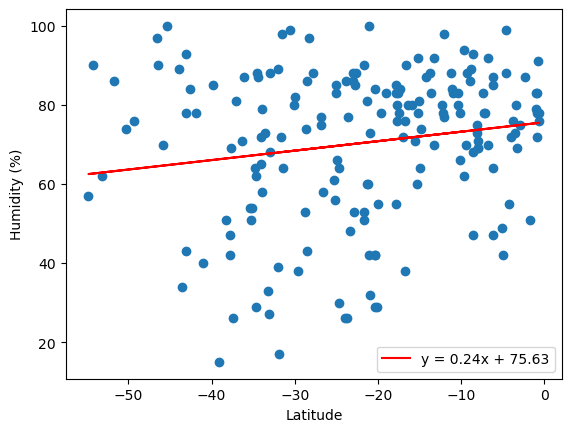

In [153]:
correlation = southern_hemi_df['Lat'].corr(southern_hemi_df['Humidity'])

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-value is: {correlation}')
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, '-r', label=line_eq)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.legend()
plt.show()

DISCUSSION OF CORRELATION FOR LATITUDE vs HUMIDITY:
Both charts of data produce very weak correlations between Latitude & Humidity which is indicative that the latitude of a city has minimal impact on it's humidity. All that can be drawn from this data is there appears to be higher levels of humidity in cities of higher altitudes. 

The r-value is: 0.09486486486818416


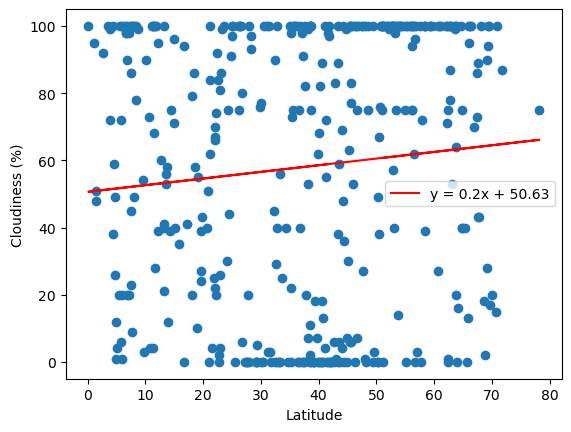

In [154]:
correlation = northern_hemi_df['Lat'].corr(northern_hemi_df['Cloudiness'])

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-value is: {correlation}')
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, '-r', label=line_eq)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.legend()
plt.show()

The r-value is: 0.02858862726370645


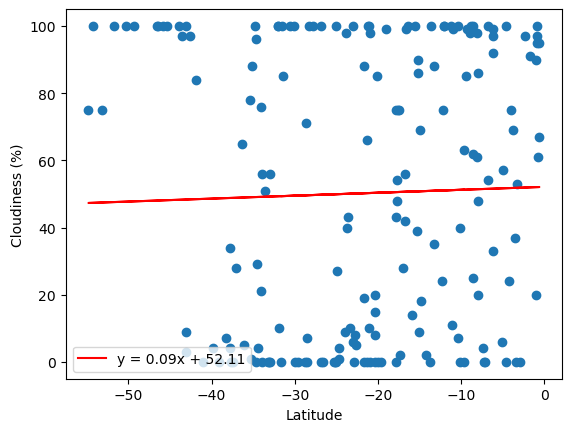

In [155]:
correlation = southern_hemi_df['Lat'].corr(southern_hemi_df['Cloudiness'])

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-value is: {correlation}')
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, '-r', label=line_eq)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.legend()
plt.show()

DISCUSSION OF CORRELATION FOR LATITUDE vs CLOUDINESS:
There appears to be incredibly weak correlation in both charts of data. The only thing we can draw from this data is many cities are either have close to no clouds, or an abundance of clouds, with few cities having moderate cloudiness. A different approach to determine the factors within the cloudiness of a city would need to be taken.

The r-value is: 0.0376092150633526


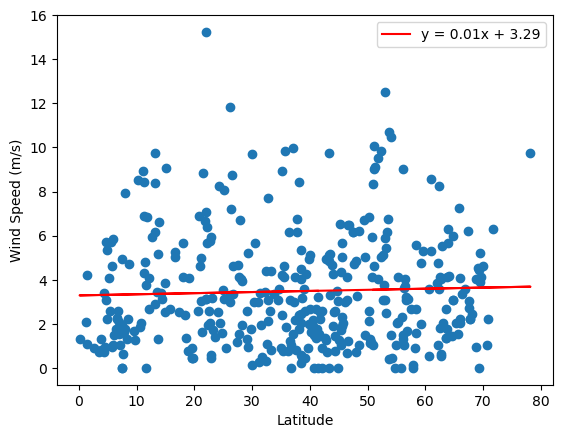

In [156]:
correlation = northern_hemi_df['Lat'].corr(northern_hemi_df['Wind Speed'])

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-value is: {correlation}')
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, '-r', label=line_eq)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.legend()
plt.show()

The r-value is: -0.16999377167614463


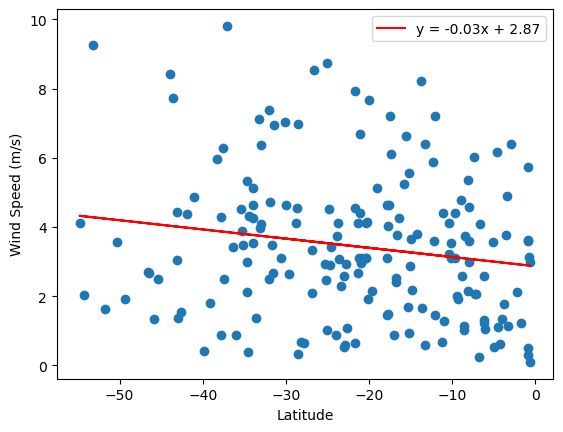

In [157]:
correlation = southern_hemi_df['Lat'].corr(southern_hemi_df['Wind Speed'])

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-value is: {correlation}')
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, '-r', label=line_eq)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.legend()
plt.show()

DISCUSSION OF CORRELATION FOR LATITUDE vs WIND SPEED:
The correlation in each of these charts also prove to be weak, indicative that a cities latitude is not a contributing factor to their wind speeds. The charts do show that most cities have rather consistend wind speeds ranging from about 1 to 5 m/s with few outliers with exceeded wind speeds. To isolate the contributing factors of wind speed, a different approach would need to be undertaken as well. 